<a href="https://colab.research.google.com/github/Untick/insects_detection/blob/main/YOLOv8_collab_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Устанавливаем библиотеки, необходимые для работы фреймворка YOLO

!pip install ultralytics
from ultralytics import YOLO
import cv2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.5/660.5 kB 4.5 MB/s eta 0:00:00


In [ ]:
# Монтируем Гугл Диск

import os
from IPython.display import Image

from google.colab import drive # Подключаем диск
drive.mount('/content/drive')

directory_path = '/content/drive/MyDrive/stajirovka3'
files = os.listdir(directory_path)

Mounted at /content/drive


In [ ]:
!nvidia-smi

Sat Dec 16 10:43:37 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Обучение модели и сохранение ее в Гугл Диск:

In [ ]:
# Копирование папок
import shutil

# Путь к исходному файлу
source_folder =  '/content/drive/MyDrive/stajirovka3/Merged New 2.0.v2i.yolov8.zip (Unzipped Files)'

# Путь к целевой папке на Google Диске
destination_folder = '/content/Data'

# Команда для копирования папки
shutil.copytree(source_folder, destination_folder)

'/content/Data'

In [ ]:
# Задаем корневую папку проекта, в которой будет находиться размеченный датасет.

ROOT_DIR = "/content/Data"

In [ ]:
# Обучение модели на 300 эпохах.

#model = YOLO("yolov8n.yaml")

result = model.train(data=os.path.join(ROOT_DIR, "/content/Data/data.yaml"), epochs=200)

Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/Data/data.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train53, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torc

train: Scanning /content/Data/train/labels.cache... 1456 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1456/1456 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Data/valid/labels.cache... 147 images, 0 backgrounds, 0 corrupt: 100%|██████████| 147/147 [00:00<?, ?it/s]


Plotting labels to runs/detect/train53/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train53
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.53G      4.036      5.025      3.933         42        640: 100%|██████████| 91/91 [00:36<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        147        605          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.25G      2.926      3.449      3.004         83        640: 100%|██████████| 91/91 [00:32<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        147        605      0.785     0.0962     0.0798     0.0304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.38G      2.698      2.816       2.64         65        640: 100%|██████████| 91/91 [00:34<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]

                   all        147        605      0.797       0.11      0.117     0.0388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.29G       2.51      2.379      2.436         34        640: 100%|██████████| 91/91 [00:32<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.00it/s]

                   all        147        605      0.414      0.305      0.276      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.29G       2.31       2.01      2.256         50        640: 100%|██████████| 91/91 [00:34<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.63it/s]

                   all        147        605      0.506       0.44      0.412      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.29G      2.206      1.774      2.123         47        640: 100%|██████████| 91/91 [00:38<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.63it/s]

                   all        147        605      0.653      0.474      0.492      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.33G      2.061      1.613      1.974         81        640: 100%|██████████| 91/91 [00:34<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]


                   all        147        605      0.742       0.54      0.605      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.33G      1.976      1.476      1.886         53        640: 100%|██████████| 91/91 [00:34<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]

                   all        147        605      0.737      0.467      0.571      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.33G      1.908      1.395      1.799         64        640: 100%|██████████| 91/91 [00:35<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]

                   all        147        605      0.778      0.554       0.65      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.31G      1.788      1.273      1.703         67        640: 100%|██████████| 91/91 [00:34<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.55s/it]

                   all        147        605      0.769      0.623      0.695      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.29G      1.771      1.244      1.662         92        640: 100%|██████████| 91/91 [00:30<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        147        605      0.784      0.599      0.691      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.31G      1.681      1.159      1.578         60        640: 100%|██████████| 91/91 [00:30<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]

                   all        147        605      0.738      0.658      0.704      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.31G      1.616      1.107      1.522         55        640: 100%|██████████| 91/91 [00:34<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]

                   all        147        605      0.794      0.663      0.769      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200       2.2G      1.584      1.044      1.497         41        640: 100%|██████████| 91/91 [00:31<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:23<00:09,  9.04s/it]

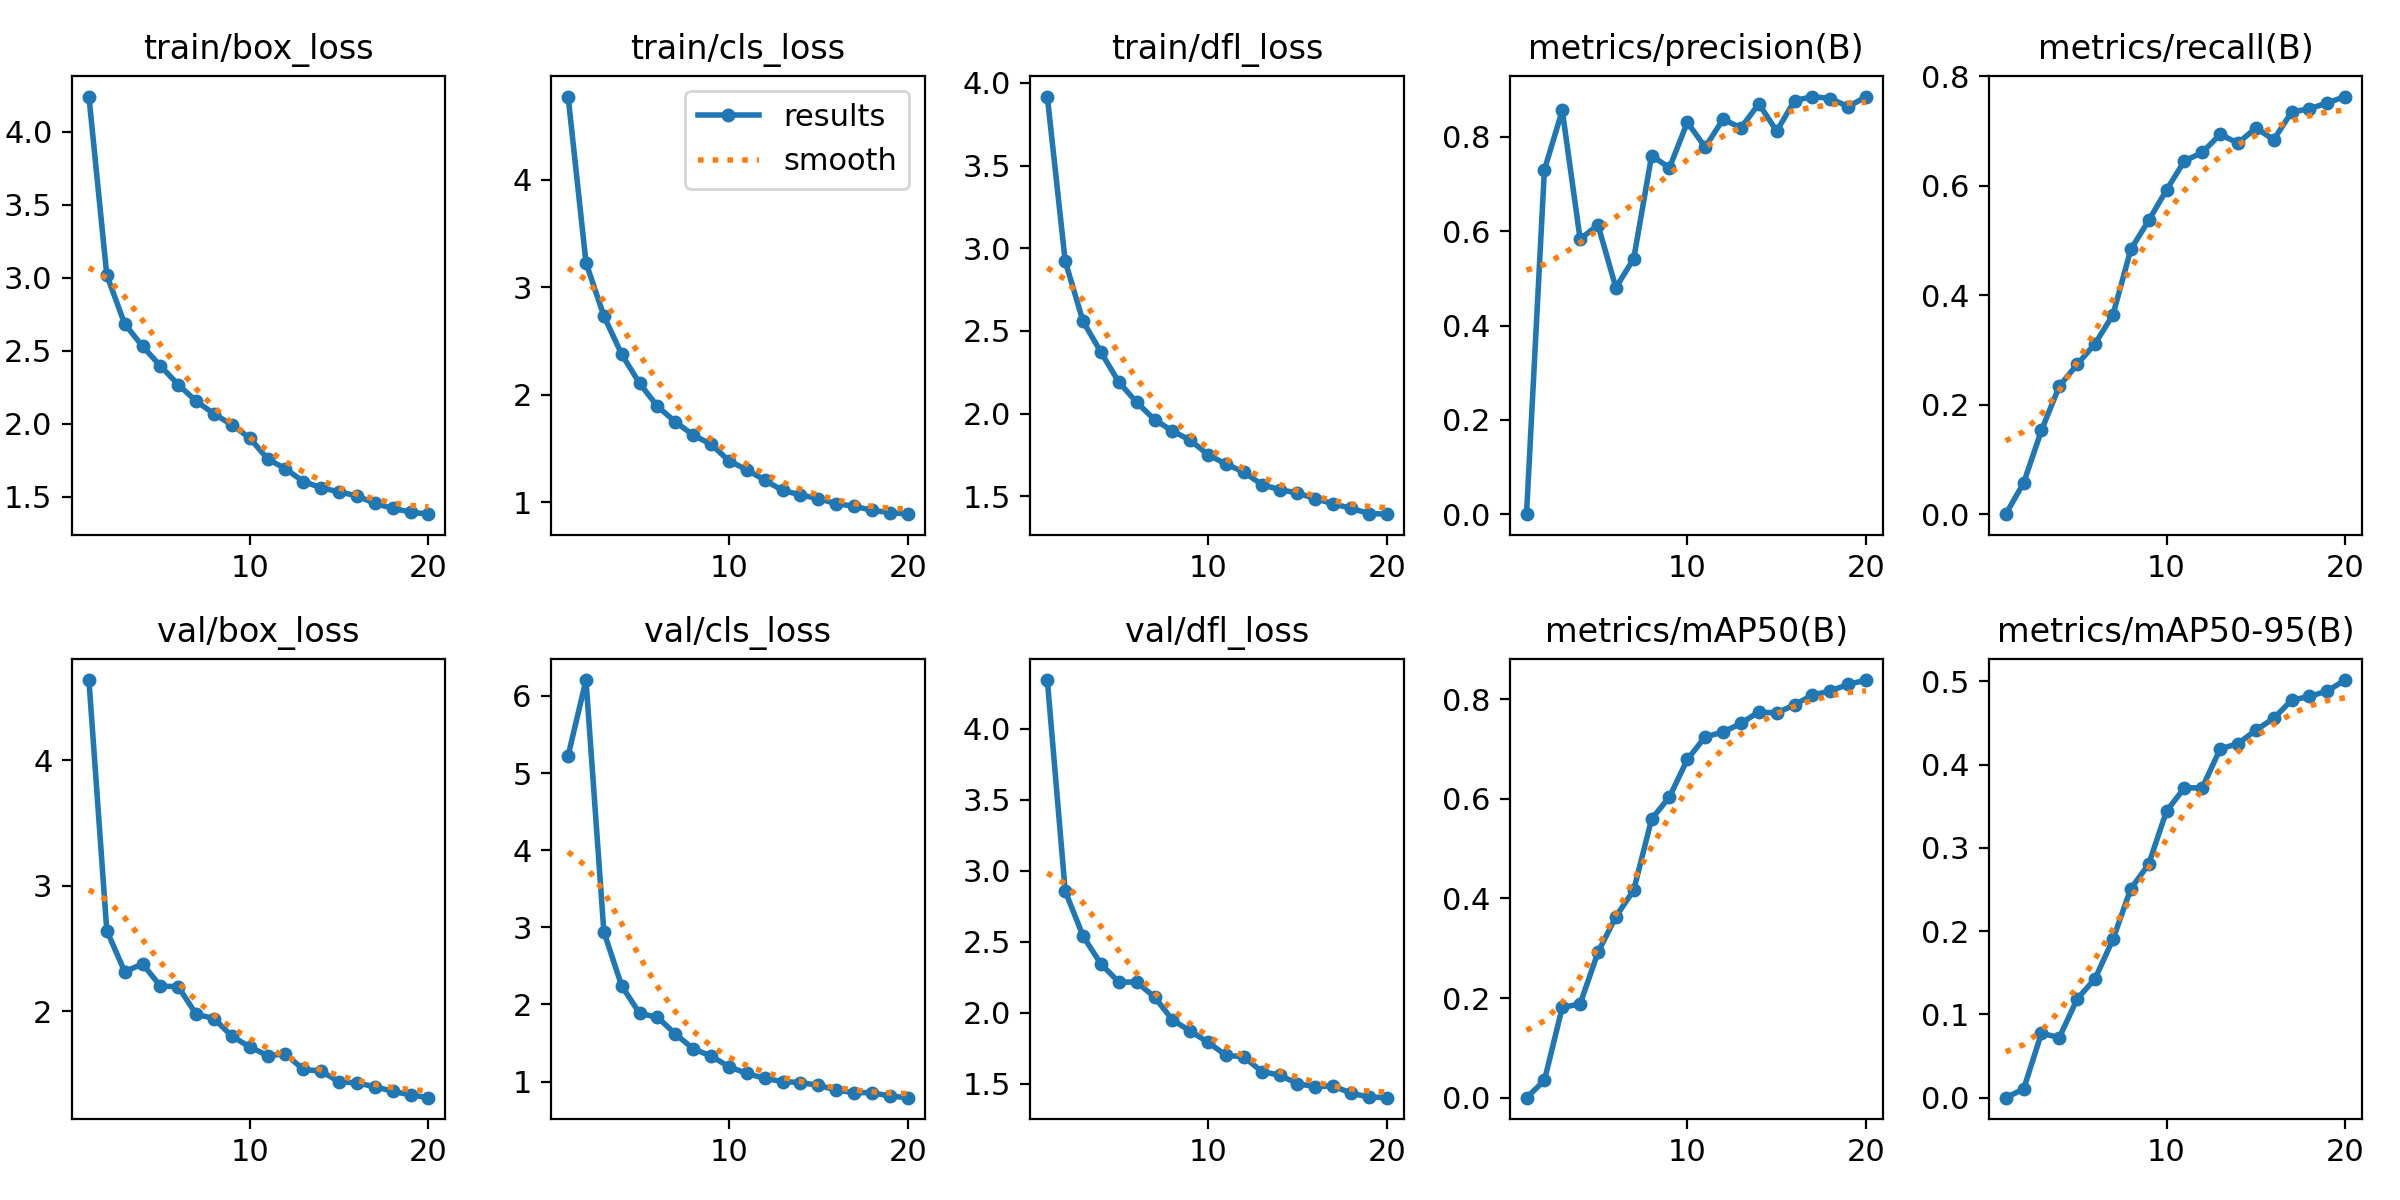

In [ ]:
# Посмотреть итог обучения
from IPython.display import Image
Image(filename='/content/runs/detect/train5/results.png', height=600)

In [ ]:
# Сохранение обученной модели на гугл-диск.

import shutil

# Путь к исходному файлу
source_folder = '/content/runs/detect/train5'

# Путь к целевой папке на Google Диске
destination_folder = '/content/drive/MyDrive/stajirovka3/_Обученные модели/runs6 - На 3 сценах, 640х640'

# Команда для копирования папки
shutil.copytree(source_folder, destination_folder)

'/content/drive/MyDrive/stajirovka3/_Обученные модели/runs6 - На 3 сценах, 640х640'

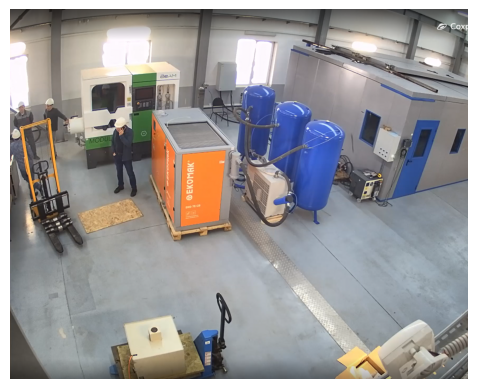

In [ ]:
import matplotlib.pyplot as plt

# Берем то что выше вывелось и подставляем сюда:
image = cv2.imread('/content/sample_data/11/2023-12-05_16-51-04.png')

# отображение изображения
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


### Предикт по видео:

In [ ]:
# Делаем предикт

#model.predict(source="/content/sample_data/4-lyudi-v-tsentre-demo.mp4", save=True,  conf=0.1, show=False)
model.predict(source="/content/sample_data/11/4-lyudi-v-tsentre-demo.mp4", save=True,  conf=0.5, show=False)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/425) /content/sample_data/11/4-lyudi-v-tsentre-demo.mp4: 384x640 (no detections), 207.2ms
video 1/1 (2/425) /content/sample_data/11/4-lyudi-v-tsentre-demo.mp4: 384x640 (no detections), 11.3ms
video 1/1 (3/425) /content/sample_data/11/4-lyudi-v-tsentre-demo.mp4: 384x640 (no detections), 9.2ms
video 1/1 (4/425) /content/sample_data/11/4-lyudi-v-tsentre-demo.mp4: 384x640 1 Person, 7.8ms
video 1/1 (5/425) /content/sample_data/11/4-lyudi-v-tsen

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Helmet', 1: 'NO-Hardhat', 2: 'Person'}
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
    

### Предикт по картинке:

In [ ]:
# Копируем из гуглдиска в коллаб

import shutil

# Путь к исходному файлу
source_folder = '/content/drive/MyDrive/stajirovka3/12. Фреймы для теста разные форматы/'

# Путь к целевой папке на Google Диске
destination_folder = '/content/sample_data/1'

#shutil.copy(source_folder, destination_folder)
shutil.copytree(source_folder, destination_folder)

'/content/sample_data/1'

In [ ]:
model.predict(source="/content/sample_data/1/2023-12-05_16-51-04.png", save=True,  conf=0.5, show=False)


WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/sample_data/1/2023-12-05_16-51-04.png: 544x640 2 Helmets, 2 Persons, 59.9ms
Speed: 22.1ms preprocess, 59.9ms inference, 1048.7ms postprocess per image at shape (1, 3, 544, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Helmet', 1: 'NO-Hardhat', 2: 'Person'}
 orig_img: array([[[ 53,  57,  62],
         [ 54,  57,  62],
         [ 55,  57,  61],
         ...,
         [ 70,  69,  68],
         [ 70,  69,  68],
         [ 70,  70,  68]],
 
        [[ 54,  58,  62],
         [ 55,  58,  62],
         [ 55,  58,  62],
         ...,
         [ 70,  69,  69],
         [ 70,  69,  69],
         [ 71,  70,  69]],
 
        [[ 55,  59,  63],
         [ 55,  59,  63],
         [ 55,  59,  62],
         ...,
         [ 71,  69,  69],
         [ 71,  70,  69],
         [ 71,  70,  69]],
 
        ...,
 
        [[ 39,  46,  52],
         [ 40,  46,  51],
         [ 41,  46,  51],
         ...,
         [ 99, 106, 110],
         [ 99, 105, 110],
         [ 97, 101, 108]],
 
        [[ 39,  45,  51],
         [ 40,  46,  51],
         [ 40,  46,  51],
         ...,

2023-12-05_16-51-04.png


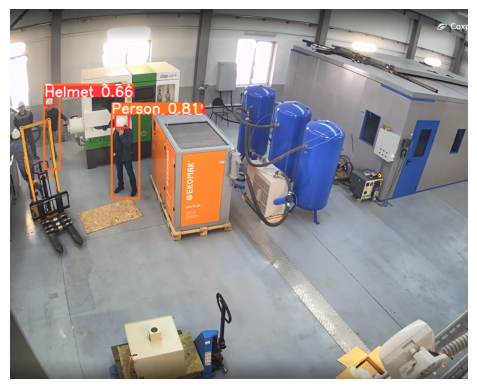

In [ ]:
# Выведем все изображения в указанной папке
import matplotlib.pyplot as plt

test_path = '/content/runs/detect/predict'
for image in os.listdir(test_path):
  img_path = os.path.join(test_path, image)
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  print(image)
  plt.axis('off')
  plt.imshow(img)
  plt.show()


In [ ]:
# Получили итог предикта /content/runs/detect/predict/test_video.avi
# Можно его скопировать результат из коллаба в гуглдиск

import shutil

# Путь к исходному файлу
source_folder = '/content/runs/detect/train52/project4.avi'

# Путь к целевой папке на Google Диске
destination_folder = '/content/drive/MyDrive/stajirovka3/'

# Копирование файла на Google Диск
shutil.copy(source_folder, destination_folder)

'/content/drive/MyDrive/stajirovka3/project4.avi'

### Демонстрация видео в коллабе:

In [ ]:
import moviepy
from moviepy.editor import *
from moviepy.editor import VideoFileClip
from IPython.display import display, clear_output

# Загрузка видеофайла
clip = VideoFileClip("/content/runs/detect/predict/4-lyudi-v-tsentre-demo.avi")

# Преобразование файла в формат mp4
clip.write_videofile("temp.mp4")

# Освобождение ресурсов
clip.close()


Moviepy - Building video temp.mp4.
Moviepy - Writing video temp.mp4



t: 100%|█████████▉| 424/426 [00:19<00:00, 33.68it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file /content/runs/detect/predict/4-lyudi-v-tsentre-demo.avi, 2764800 bytes wanted but 0 bytes read,at frame 425/426, at time 14.17/14.17 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready temp.mp4


In [ ]:
# Воспроизведем видео в формате mp4 по указанному пути:

ipython_display('/content/temp.mp4')


### Восстановление обученной модели из Гугл Диска:

In [ ]:
# Здесь код для копирования нашей обученной модели с гугл-диска в коллаб.
# У нее достаточно небольшой вес, поэтому можно загрузить прямо с гугл-диска, копировать в коллаб необязательно

model_path = '/content/drive/MyDrive/stajirovka3/_Обученные модели/runs6 - На 3 сценах, 640х640/weights/best.pt'
model = YOLO(model_path)

### Предикт всех картинок в папке с сохранением в одну папку:

In [ ]:
source_folder = '/content/sample_data/1'
output_folder = '/content/sample_data/predictions' # создаем папку для сохранения результатов предикта
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

files = os.listdir(source_folder)

# проходим по каждому файлу и делаем предикт
for file in files:
    if file.endswith('.jpg') or file.endswith('.png'): # проверяем, что это картинка
        source_file = os.path.join(source_folder, file) # получаем полный путь к файлу
        output_file = os.path.join(output_folder, file) # создаем путь для сохранения результата предикта
        model.predict(source=source_file, save=output_file, conf=0.1, show=False) # делаем предикт и сохраняем результат в одну папку

TypeError: ignored

In [ ]:
source_folder = '/content/sample_data/1'
files = os.listdir(source_folder)

# проходим по каждому файлу и делаем предикт
for file in files:
    if file.endswith('.jpg') or file.endswith('.png'): # проверяем, что это картинка
        source_file = os.path.join(source_folder, file) # получаем полный путь к файлу
        model.predict(source=source_file, save=True, conf=0.1, show=False) # делаем предикт



image 1/1 /content/sample_data/1/2023-12-05_16-53-13.png: 480x640 (no detections), 91.0ms
Speed: 7.2ms preprocess, 91.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/train235

image 1/1 /content/sample_data/1/2023-12-05_17-00-13.png: 480x640 (no detections), 12.6ms
Speed: 6.5ms preprocess, 12.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/train236

image 1/1 /content/sample_data/1/2023-12-05_16-51-52.png: 640x416 (no detections), 91.1ms
Speed: 6.7ms preprocess, 91.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 416)
Results saved to runs/detect/train237

image 1/1 /content/sample_data/1/2023-12-05_16-51-29.png: 512x640 (no detections), 93.5ms
Speed: 4.1ms preprocess, 93.5ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/train238

image 1/1 /content/sample_data/1/2023-12-05_16-54-21.png: 480x640 (no detections), 12.4ms
Speed

### Служебный код:

In [ ]:
# Очистка мусора из ОЗУ

import gc
gc.collect()

2128

In [ ]:
# Копируем из гуглдиска в коллаб

import shutil

# Путь к исходному файлу
source_folder = '/content/drive/MyDrive/stajirovka3/8. Видео для теста/4-lyudi-v-tsentre-demo.mp4'

# Путь к целевой папке на Google Диске
destination_folder = '/content/sample_data/11'

# Копирование файла на Google Диск
shutil.copy(source_folder, destination_folder)

# Копирование папки
#shutil.copytree(source_folder, destination_folder)

'/content/sample_data/11/4-lyudi-v-tsentre-demo.mp4'